# 1. Importación de librerías


In [7]:
#importaciones de librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #estadísticas de los datos
from matplotlib import rcParams

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.preprocessing import StandardScaler

#librerias parte 2
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix , precision_score,  recall_score, auc,roc_curve,accuracy_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score


# 2. Carga del DataSet
Este dataset se utiliza para predecir si los ingresos de una persona son mayores o menores a $50k al año.

Contiene varias variables numéricas y categóricas como 'clase-trabajador', 'educacion', 'raza', entre otros.

In [8]:
# Cargar el dataset
url = "/content/sample_data/adult.data"
#se les pone nombres a las columnas ya que el archivo no tiene
columns = [
    'edad', 'clase-trabajo', 'fnlwgt', 'educacion', 'educacion-num', 'estado-civil',
    'occupacion', 'relacion', 'raza', 'sexo', 'capital-ganancia', 'capital-perdida',
    'horas-por-semana', 'pais', 'ingreso'
]

# Este dataSet representa los valores nulos con el signo '?', por lo que es importante tratarlo este signo como null
#
adultos = pd.read_csv(url, names=columns, na_values='?', skipinitialspace=True)


In [9]:
#Indicar el tamaño del conjunto de datos
adultos.shape

(32561, 15)

In [10]:
adultos.head()

,edad,clase-trabajo,fnlwgt,educacion,educacion-num,estado-civil,occupacion,relacion,raza,sexo,capital-ganancia,capital-perdida,horas-por-semana,pais,ingreso
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
adultos.tail()

,edad,clase-trabajo,fnlwgt,educacion,educacion-num,estado-civil,occupacion,relacion,raza,sexo,capital-ganancia,capital-perdida,horas-por-semana,pais,ingreso
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [12]:
#Guardamos el dataSet original para no perder esa información
adultosPreProcesing = adultos

# 3. Preprocesamiento de Datos



### 3.1 Tratamiento de valores duplicados

In [13]:
#Verificar la existencia de duplicados
numeroDuplicados = adultos.duplicated(keep=False).sum()
print("El número de registros duplicados son: ",numeroDuplicados)
adultos[adultos.duplicated(keep=False)]

El número de registros duplicados son:  47


,edad,clase-trabajo,fnlwgt,educacion,educacion-num,estado-civil,occupacion,relacion,raza,sexo,capital-ganancia,capital-perdida,horas-por-semana,pais,ingreso
2303,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
3917,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
4325,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4767,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4940,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,>50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
5579,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
5805,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
5842,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


In [14]:
adultos.shape

(32561, 15)

In [15]:
if numeroDuplicados > 0:
  adultos = adultos.drop_duplicates()
  print(adultos.shape)

(32537, 15)


### 3.2 Determinar si hay valores faltantes en al menos un atributo categórico o numérico (valores nulos)

Imprimimos por cada columna cuantos valores nulos hay

In [16]:
adultos.isnull().sum()

edad                   0
clase-trabajo       1836
fnlwgt                 0
educacion              0
educacion-num          0
estado-civil           0
occupacion          1843
relacion               0
raza                   0
sexo                   0
capital-ganancia       0
capital-perdida        0
horas-por-semana       0
pais                 582
ingreso                0
dtype: int64

Debido a que los valores nulos son de datos categóricos, vamos a remplazarlo por la moda.

In [17]:
moda_clase = adultos['clase-trabajo'].mode()[0]
moda_ocupacion = adultos['occupacion'].mode()[0]
moda_pais = adultos['pais'].mode()[0]


adultos.loc[adultos['clase-trabajo'].isna(), 'clase-trabajo'] = moda_clase
adultos.loc[adultos['occupacion'].isna(), 'occupacion'] = moda_ocupacion
adultos.loc[adultos['pais'].isna(), 'pais'] = moda_pais

Verificamos que ya no existan valores nulos.

In [18]:
adultos.isnull().sum()

edad                0
clase-trabajo       0
fnlwgt              0
educacion           0
educacion-num       0
estado-civil        0
occupacion          0
relacion            0
raza                0
sexo                0
capital-ganancia    0
capital-perdida     0
horas-por-semana    0
pais                0
ingreso             0
dtype: int64

### 3.3 Especificar las variables de cada tipo

In [19]:
adultos.dtypes

edad                 int64
clase-trabajo       object
fnlwgt               int64
educacion           object
educacion-num        int64
estado-civil        object
occupacion          object
relacion            object
raza                object
sexo                object
capital-ganancia     int64
capital-perdida      int64
horas-por-semana     int64
pais                object
ingreso             object
dtype: object

**explicación de las variables**

*   **Edad**: Variable de tipo entera discreta categórica, ya que clasifica a las personas por su edad
*   **clase-trabajo**: Variable categórica que indica a que clase trabajadora pertenece la persona
*   **fnlwgt**: Variable numérica continua que representa una estimación del número de personas en la población general que tienen la misma combinación de características demográficas que el individuo representado
*   **educacion**: Variable categórica que indica el nivel de educación de la persona
*   **educacion-num**: Variable numérica discreta categórica, que representa con un número el nivel de educación de la persona
*   **estado-civil**: Variable categórica que representa el estado civil de la persona
*   **occupacion**: Variable categórica que representa el tipo de ocupación laboral
*   **relacion**: Variable categórica que describe la relación de cada individuo con el cabeza de familia en su hogar
*   **raza**: Variable categórica que indica la descendencia étnica de la persona
*   **sexo**: Variable categórica que describe el sexo de la persona
*   **capital-ganancia**: Variable continua que representa las ganancias de capital que un individuo ha obtenido durante un año
*   **capital-perdida**: Variable continua la cual representa las pérdidas de capital que un individuo ha sufrido durante un año
*   **horas-por-semana**: Variable continua que indica la cantidad de horas que trabaja el individuo por semana.
*   **pais**: Variable categórica que representa el país de origen
*   **ingreso**: Variable categórica y en este caso nuestro objetivo de análisis, el cual indica si una persona ganas más o menos de 50mil dólares al año


### 3.4 Determinar si hay valores fuera de rango en al menos un atributo numérico

Vamos a analizar si hay edades fuera de rango o inusuales,
como es un análisis de capital y enfocados a adultos, vamos a delimitar la edad para que sea mayor a 18 años y menos de 90 años

In [20]:
out_of_range_age = adultos[(adultos['edad'] < 18) | (adultos['edad'] > 90)]
print(f"La cantidad de valores fuera de rango de la edad son: {len(out_of_range_age)}")

La cantidad de valores fuera de rango de la edad son: 395


Hay varios registros de personas que son menores de edad, el cual estaría fuera de nuestro análisis de adultos, estos datos fuera de rango se trataran más adelante.

Se verificará las horas de trabajo fuera de rango, por ejemplo en ciertos países la jornada laboral en relación de dependencia puede subir a 9 horas de lunes a viernes; para nuestro análisis vamos a verificar si hay personas que trabajan esa cantidad de horas pero de lunes a domingo.

In [21]:
horaFueraRango = adultos[(adultos['horas-por-semana'] > 63)]
print(f"La cantidad de valores fuera de rango de las horas de trabajo por semana son: {len(horaFueraRango)}")

La cantidad de valores fuera de rango de las horas de trabajo por semana son: 1080


Como se ve más de mil personas trabajan más de 9 horas a la semana de lunes a domingo, este dato a pesar de ser preocupante se mantendrá en el análisis, ya que considero importante cual es la situación final de este grupo de personas.

### 3.5 Calculo estadístico de variables numéricas y categóricas.

De las variables numéricas calculamos su media, mediana y moda.

In [22]:
media_fnlwgt = adultos['fnlwgt'].mean().round(2)
mediana_fnlwgt= adultos['fnlwgt'].median()
moda_fnlwgt = adultos['fnlwgt'].mode()[0]

media_hours_per_week = adultos['horas-por-semana'].mean().round(2)
mediana_hours_per_week = adultos['horas-por-semana'].median()
moda_hours_per_week = adultos['horas-por-semana'].mode()[0]

media_ganancia = adultos['capital-ganancia'].mean().round(2)
mediana_ganancia = adultos['capital-ganancia'].median()
moda_ganancia = adultos['capital-ganancia'].mode()[0]

media_perdida = adultos['capital-perdida'].mean().round(2)
mediana_perdida = adultos['capital-perdida'].median()
moda_perdida = adultos['capital-perdida'].mode()[0]

# Imprimir los resultados
print(f"Media de fnlwgta: {media_fnlwgt}")
print(f"Mediana de fnlwgt: {mediana_fnlwgt}")
print(f"Moda de fnlwgt: {moda_fnlwgt}")

print('')
print(f"Media de horas-por-semana: {media_hours_per_week}")
print(f"Mediana de horas-por-semana: {mediana_hours_per_week}")
print(f"Moda de horas-por-semana: {moda_hours_per_week}")

print('')
print(f"Media de capital-ganancia: {media_ganancia}")
print(f"Mediana de capital-ganancia: {mediana_ganancia}")
print(f"Moda de capital-ganancia: {moda_ganancia}")

print('')
print(f"Media de capital-perdida: {media_perdida}")
print(f"Mediana de capital-perdida: {mediana_perdida}")
print(f"Moda de capital-perdida: {moda_perdida}")

Media de fnlwgta: 189780.85
Mediana de fnlwgt: 178356.0
Moda de fnlwgt: 123011

Media de horas-por-semana: 40.44
Mediana de horas-por-semana: 40.0
Moda de horas-por-semana: 40

Media de capital-ganancia: 1078.44
Mediana de capital-ganancia: 0.0
Moda de capital-ganancia: 0

Media de capital-perdida: 87.37
Mediana de capital-perdida: 0.0
Moda de capital-perdida: 0


De las variables categóricas calcularemos la moda para ver cuál es el valor que más se repite por campo.

In [23]:
moda_edad         = adultos['edad'].mode()[0]
moda_clase_trabajo= adultos['clase-trabajo'].mode()[0]
moda_educacion    = adultos['educacion'].mode()[0]
moda_estado_civil = adultos['estado-civil'].mode()[0]
moda_occupacion   = adultos['occupacion'].mode()[0]
moda_relacion     = adultos['relacion'].mode()[0]
moda_raza         = adultos['raza'].mode()[0]
moda_sexo         = adultos['sexo'].mode()[0]
moda_pais         = adultos['pais'].mode()[0]
moda_ingreso      = adultos['ingreso'].mode()[0]

# Imprimir los resultados
print(f"Moda de edad: {moda_edad}")
print(f"Moda de clase de trabajo: {moda_clase_trabajo}")
print(f"Moda de nivel de educacion: {moda_educacion}")
print(f"Moda de estado civil: {moda_estado_civil}")
print(f"Moda de ocupacion: {moda_occupacion}")
print(f"Moda de relacion: {moda_relacion}")
print(f"Moda de raza: {moda_raza}")
print(f"Moda de sexo: {moda_sexo}")
print(f"Moda de pais: {moda_pais}")
print(f"Moda de ingreso: {moda_ingreso}")

Moda de edad: 36
Moda de clase de trabajo: Private
Moda de nivel de educacion: HS-grad
Moda de estado civil: Married-civ-spouse
Moda de ocupacion: Prof-specialty
Moda de relacion: Husband
Moda de raza: White
Moda de sexo: Male
Moda de pais: United-States
Moda de ingreso: <=50K


### 3.6 Realizar el diagrama de barras de al menos una variable categórica

Se realiza un gráfico de barras del nivel de educación de la persona, esta se mostrara ordenada de mayor a menor y se colocara una leyenda en la parte superior de la barra con el número de personas que tienen ese nivel de educación.

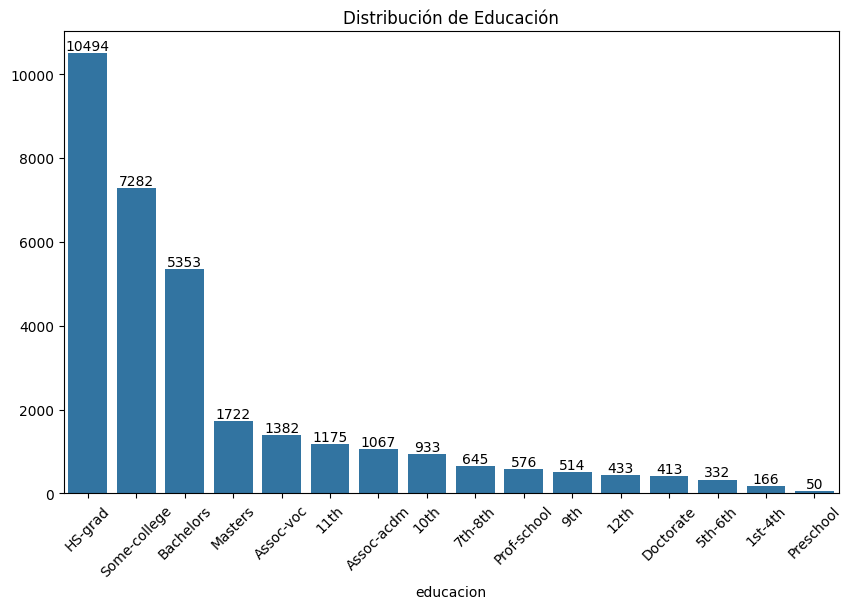

In [24]:
conteo_educacion = adultos['educacion'].value_counts()
conteo_educacion_ordenado = conteo_educacion.sort_values(ascending=False)

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_educacion_ordenado.index, y=conteo_educacion_ordenado.values)

for i, v in enumerate(conteo_educacion_ordenado.values):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)


# Rotacion de las etiquetas
plt.xticks(rotation=45)
plt.title('Distribución de Educación')
plt.show()

Se puede ver que los niveles de educación más comunes son HS-grad, Some-college y Bachelors.

Se realiza esta vez un gráfico de barras horizontal para ver la distribución del tipo de trabajo de las personas.

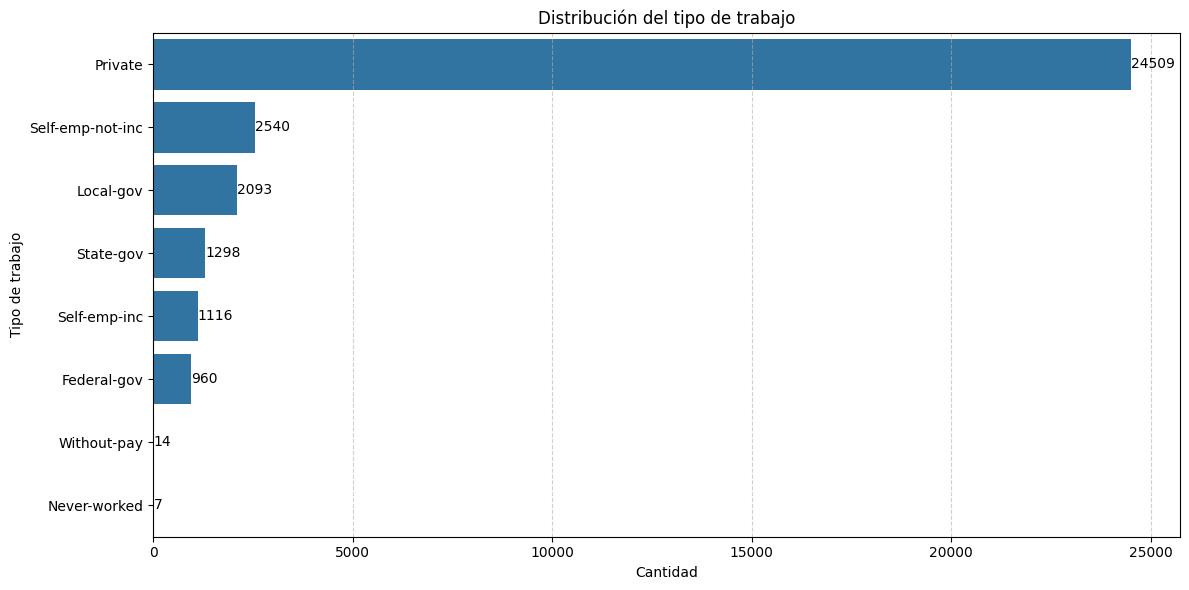

In [25]:
conteo_trabajo = adultos['clase-trabajo'].value_counts()
conteo_trabajo_ordenado = conteo_trabajo.sort_values(ascending=False)

# Creamos el gráfico de barras horizontal
plt.figure(figsize=(12, 6))
sns.barplot(x=conteo_trabajo_ordenado.values, y=conteo_trabajo_ordenado.index)

for i, v in enumerate(conteo_trabajo_ordenado.values):
    plt.text(v + 0.1, i, str(v), ha='left', va='center', fontsize=10)

plt.yticks(rotation=0)
plt.title('Distribución del tipo de trabajo')
plt.xlabel('Cantidad')
plt.ylabel('Tipo de trabajo')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()  # Ajustamos el espacio entre los elementos del gráfico

plt.show()

Se puede observar que la gran mayoría tiene un tipo de trabajo privado.

### 3.7 Realizar el histograma de al menos una variable numérica

Se realiza un histograma de las horas por semana de trabajo que realiza las personas

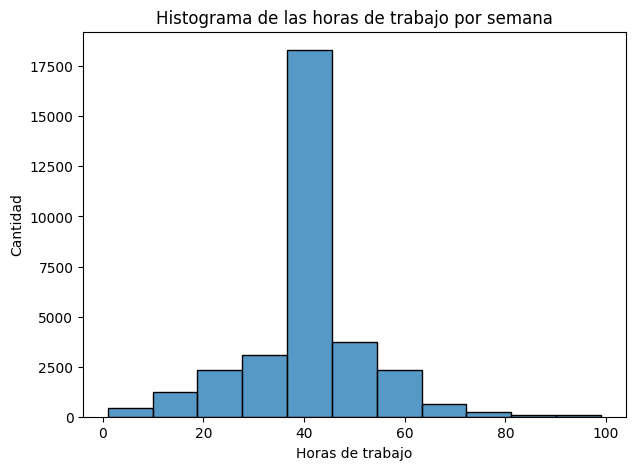

In [26]:
plt.figure(figsize=(7, 5))
sns.histplot(data=adultos, x='horas-por-semana', bins=11)

plt.title('Histograma de las horas de trabajo por semana')
plt.xlabel('Horas de trabajo')
plt.ylabel('Cantidad')
plt.show()

Vemos que hay una gran tendencia de trabajar 40 horas por semana, y el grafico nos muestra una campana de Gauss

Ahora se muestra el histograma de la columna capital-ganancia

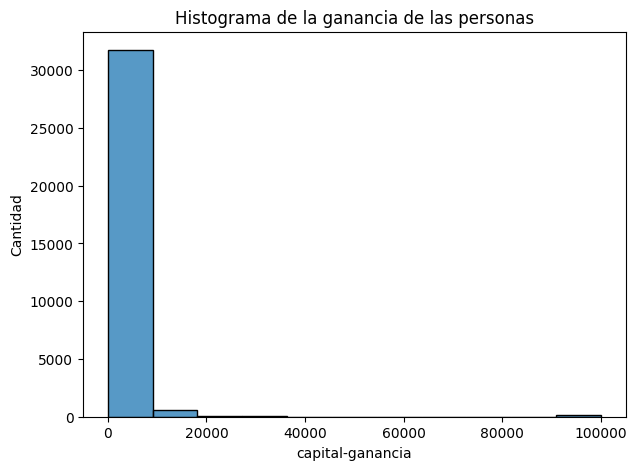

In [27]:
plt.figure(figsize=(7, 5))
sns.histplot(data=adultos, x='capital-ganancia', bins=11)

plt.title('Histograma de la ganancia de las personas')
plt.xlabel('capital-ganancia')
plt.ylabel('Cantidad')
plt.show()

Vemos que la gran mayoría de personas tiene una ganancia de capital por debajo de los 20000 dólares.

Ahora se muestra el histograma de la columna capital-perdida

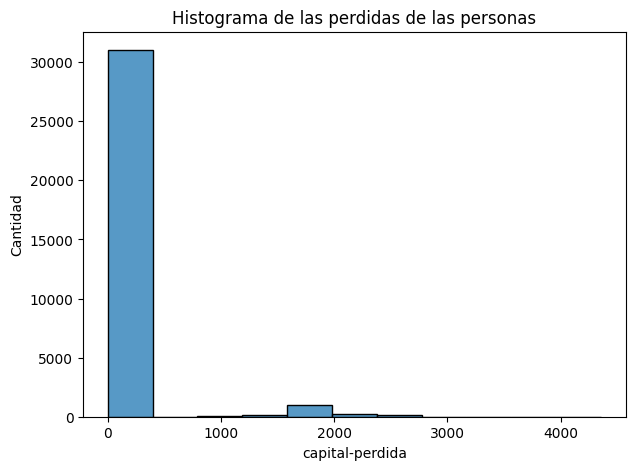

In [28]:
plt.figure(figsize=(7, 5))
sns.histplot(data=adultos, x='capital-perdida', bins=11)

plt.title('Histograma de las perdidas de las personas')
plt.xlabel('capital-perdida')
plt.ylabel('Cantidad')
plt.show()

Vemos que la gran mayoría de personas tiene una pérdida de capital por debajo de los 500 dólares, y un pequeño grupo entre 1500 y 2500 dólares de perdida.

### 3.8 Identificar la variable target y verificar el balance entre clases

In [29]:
target_objetivo = adultos['ingreso'].value_counts(normalize=True)
target_objetivo = target_objetivo * 100
print(f"Balance de la variable objetivo ingresos:\n{target_objetivo}")

Balance de la variable objetivo ingresos:
ingreso
<=50K    75.907428
>50K     24.092572
Name: proportion, dtype: float64


Visualizamos en un gráfico la distribución de la variable objetivo.

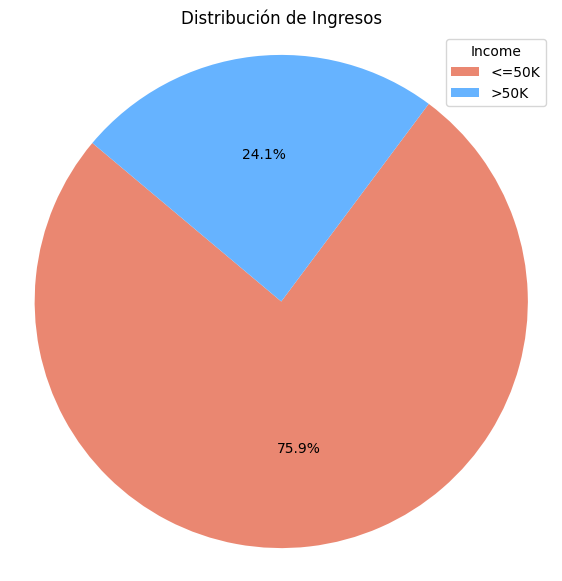

In [30]:
distribucion = adultos['ingreso'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(7, 7))
plt.pie(distribucion,  autopct='%1.1f%%', startangle=140, colors=['#EA8771','#66b3ff'])
plt.title('Distribución de Ingresos')
plt.axis('equal')

plt.legend(title='Income', loc='upper right', labels=distribucion.index)
plt.show()

Vemos que menos del 25% de las personas ganan más de $50000.

### 3.9 Tratar los valores fuera de rango

En base a la variable out_of_range_age que se calculó en el punto 3.4, vamos a tratar las edades fuera de rango.

In [31]:
print(adultos.shape)

if len(out_of_range_age) > 0:
  adultos = adultos[(adultos['edad'] >= 18) & (adultos['edad'] <= 90)]
  print(adultos.shape)

(32537, 15)
(32142, 15)


Del campo **fnlwgt** vamos a ver si hay valores fueras de rango usando boxplot

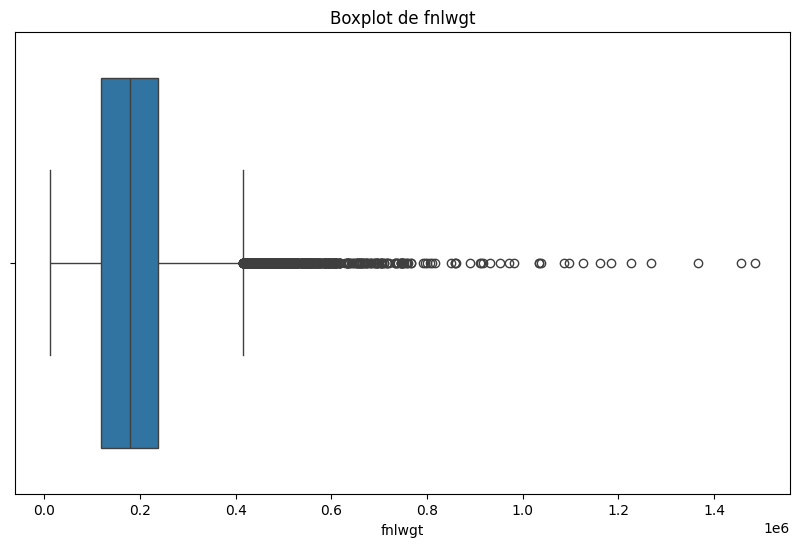

In [32]:
# 1. Identificar valores fuera de rango del campo 'fnlwgt' usando boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=adultos['fnlwgt'])
plt.title('Boxplot de fnlwgt')
plt.show()

In [33]:
# Calcular los cuartiles y los límites para detectar outliers
Q1 = adultos['fnlwgt'].quantile(0.2)
Q3 = adultos['fnlwgt'].quantile(0.8)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers = adultos[(adultos['fnlwgt'] < lower_bound) | (adultos['fnlwgt'] > upper_bound)]
print(f"Número de valores fuera de rango en 'fnlwgt': {len(outliers)}")
print(f"Porcentaje de valores fuera de rango en 'fnlwgt ': {((len(outliers) / len(adultos['fnlwgt'])) * 100):.2f} %")


Número de valores fuera de rango en 'fnlwgt': 409
Porcentaje de valores fuera de rango en 'fnlwgt ': 1.27 %


Como se ve el porcentaje de outlier de este campo es inferior al 1.5% considero que es importante mantenerlo ya que es un valor posible debido a la gran complejidad del sistema socioeconómico de las personas.

# 4. Transformación de Datos

### 4.1 Realizar diagramas de dispersión

Realizamos un diagrama de dispersión entre las ganancia y perdidas de capital y que a partir de estas dos variables se vea si la persona gana o no más de $50000 al año.

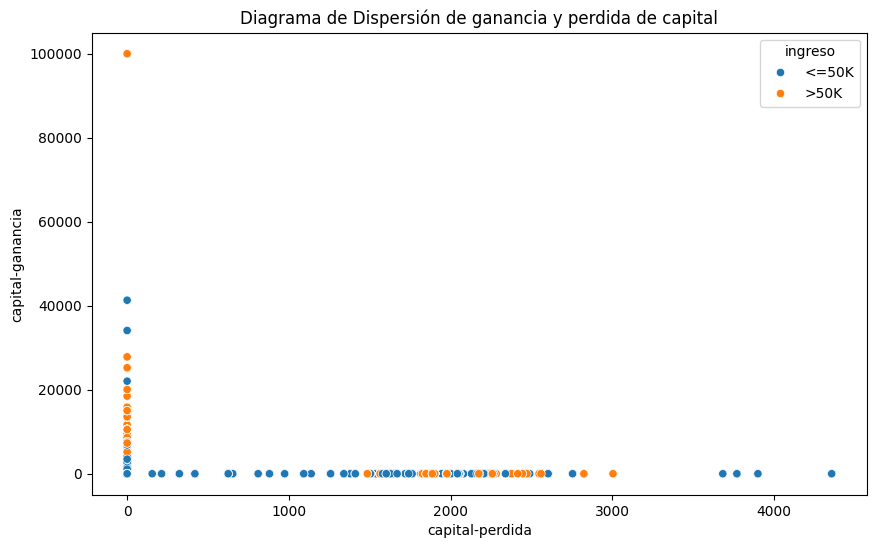

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=adultos, x='capital-perdida', y='capital-ganancia',hue='ingreso')
plt.title('Diagrama de Dispersión de ganancia y perdida de capital')
plt.show()

Se puede ver dos extremos en donde las personas que más ganan y menos pierden capital tienen más probabilidades de tener ganancias superiores a $50000, aunque también hay ciertas matices en donde la relación de estas variables no es tan determinante para determinar esa ganancia, por lo que seguramente se involucran más factores.

Realizamos un diagrama de dispersión entre el nivel de educación y la clase de trabajo.

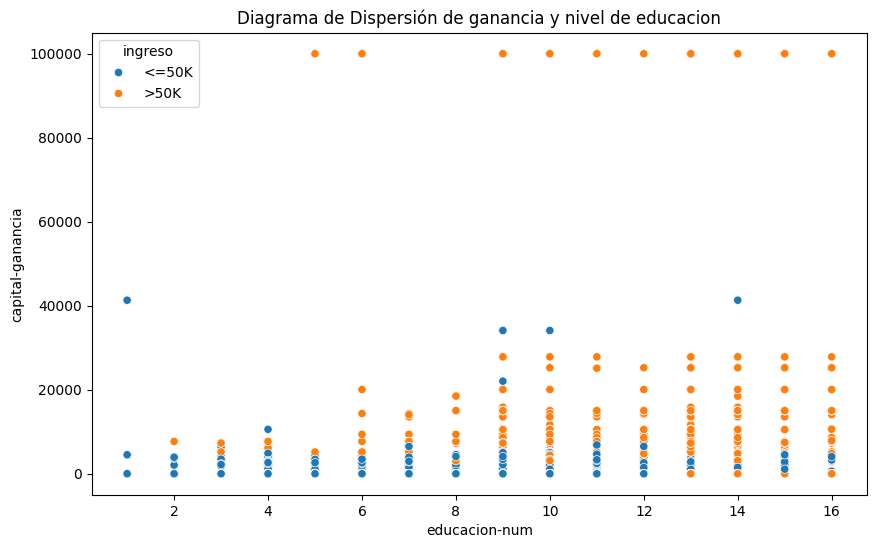

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=adultos, x='educacion-num', y='capital-ganancia',hue='ingreso')
plt.title('Diagrama de Dispersión de ganancia y nivel de educacion')
plt.show()

Se puede apreciar que un mejor nivel de educación da mayores probabilidades de tener más ganancias.

### 4.2 Generar variables nuevas y mapear valores de atributos categóricos


Vamos a agrupar de una manera más sencilla el nivel de educación.

In [36]:
#Para eso imprimimos el nivel de educación con su respectivo orden
odernadosPorEducacion = adultos.groupby('educacion-num')
listaOrdenada = odernadosPorEducacion[['educacion', 'educacion-num']].head(1)

listaOrdenada = listaOrdenada.sort_values(by='educacion-num')
listaOrdenada[['educacion','educacion-num']]

,educacion,educacion-num
224,Preschool,1
160,1st-4th,2
56,5th-6th,3
15,7th-8th,4
6,9th,5
77,10th,6
3,11th,7
415,12th,8
2,HS-grad,9
10,Some-college,10


Creamos una función que dependiendo el nivel de educación lo restructurara como Primaria, secundaria, técnica o superior.

In [37]:
def nivelEducacion(educacion):
    if educacion in ['Preschool', '1st-4th', '5th-6th', '7th-8th']:
        return 'Primaria'
    elif educacion in ['9th', '10th', '11th', '12th','HS-grad']:
        return 'Secundaria'
    elif educacion in ['Some-college', 'Assoc-voc','Assoc-acdm','Bachelors']:
        return 'Técnica'
    elif educacion in [ 'Masters', 'Prof-school', 'Doctorate']:
        return 'Superior'
    else:
        return 'Otro'

adultos['educacion'] = adultos['educacion'].apply(nivelEducacion)
adultos['educacion'].unique()

array(['Técnica', 'Secundaria', 'Superior', 'Primaria'], dtype=object)

En base a esta nueva columna restructuraremos la columna que representa el nivel de educación por un número.

In [38]:
def nivelEducacionNum(educacion):
    if educacion in ['Primaria']:
        return 1
    elif educacion in ['Secundaria']:
        return 2
    elif educacion in ['Técnica']:
        return 3
    elif educacion in [ 'Superior']:
        return 4
    else:
        return 0

adultos['educacion-num'] = adultos['educacion'].apply(nivelEducacionNum)
adultos['educacion-num'].unique()

array([3, 2, 4, 1])

Asignamos una columna numérica a las columnas categóricas que lo necesiten.

clase-trabajo: Como son pocos valores, asignamos el valor numérico por medio de un diccionario y por el map()

In [39]:
print(adultos['clase-trabajo'].unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


In [40]:
etiquetasIngreso = {'Never-worked': 0,'Without-pay':1,'Self-emp-not-inc':2,
                    'Self-emp-inc':3,'Private':4,'Local-gov':5,'Federal-gov':6,'State-gov':7}

columnaClaseTrabajo = adultos['clase-trabajo'].map(etiquetasIngreso)

# Insertar la nueva columna 'clase-trabajo-num' después de 'clase-trabajo'
indiceClase = adultos.columns.get_loc('clase-trabajo')

if 'clase-trabajo-num' not in adultos.columns:
  adultos.insert(indiceClase + 1, 'clase-trabajo-num', columnaClaseTrabajo)


estado-civil: Como son pocos valores, asignamos el valor númerico por medio de un diccionario y por el map()

In [41]:
print(adultos['estado-civil'].unique())

['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


In [42]:
etiquetasEstado = {'Never-married'      : 0, 'Widowed'               : 1,
                   'Divorced'           : 2, 'Separated'             : 3,
                   'Married-AF-spouse'  : 4, 'Married-spouse-absent' : 5,
                   'Married-civ-spouse' : 6}

columnaEstadCiv = adultos['estado-civil'].map(etiquetasEstado)
indiceEstad = adultos.columns.get_loc('estado-civil')

if 'estado-civil-num' not in adultos.columns:
  adultos.insert(indiceEstad + 1, 'estado-civil-num', columnaEstadCiv)

ocupacion: Al ser bastantes registros, nos apoyamos de LabelEncoder, el cual asigna los números en base al orden alfabético de las categorías

In [43]:
print(adultos['occupacion'].unique())

['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']


In [44]:
#from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
columnaNew = label_encoder.fit_transform(adultos['occupacion'])

indice = adultos.columns.get_loc('occupacion')

if 'occupacion-num' not in adultos.columns:
  adultos.insert(indice + 1, 'occupacion-num', columnaNew)


relacion: Como son pocos valores, asignamos el valor númerico por medio de un diccionario y por el map().

In [45]:
print(adultos['relacion'].unique())

['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']


In [46]:
etiquetasRelacion = {'Not-in-family' : 0, 'Other-relative' : 1,
                    'Unmarried'      : 2, 'Own-child'      : 3,
                    'Wife'           : 4, 'Husband'        : 5}

columnaNew = adultos['relacion'].map(etiquetasRelacion)
indice = adultos.columns.get_loc('relacion')

if 'relacion-num' not in adultos.columns:
  adultos.insert(indice + 1, 'relacion-num', columnaNew)


raza: Como son pocos valores, asignamos el valor númerico por medio de un diccionario y por el map()

In [47]:
print(adultos['raza'].unique())

['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']


In [48]:
etiquetasRaza = {'Other'              : 0, 'White'              : 1,
                 'Black'              : 2, 'Asian-Pac-Islander' : 3,
                 'Amer-Indian-Eskimo' : 4}

columnaNew = adultos['raza'].map(etiquetasRaza)
indice = adultos.columns.get_loc('raza')

if 'raza-num' not in adultos.columns:
  adultos.insert(indice + 1, 'raza-num', columnaNew)

sexo: Como son pocos valores, asignamos el valor númerico por medio de un diccionario y por el map().

In [49]:
print(adultos['sexo'].unique())

['Male' 'Female']


In [50]:
etiquetasSexo = {'Female': 0, 'Male': 1}

columnaNew = adultos['sexo'].map(etiquetasSexo)
indice = adultos.columns.get_loc('sexo')

if 'sexo-num' not in adultos.columns:
  adultos.insert(indice + 1, 'sexo-num', columnaNew)


pais: Al ser bastantes registros, nos apoyamos de LabelEncoder, el cual asigna los números en base al orden alfabético de las categorías

In [51]:
print(adultos['pais'].unique())

['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'South' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Italy'
 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos' 'Taiwan'
 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador' 'France'
 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']


In [52]:
columnaNew = label_encoder.fit_transform(adultos['pais'])
indice = adultos.columns.get_loc('pais')

if 'pais-num' not in adultos.columns:
  adultos.insert(indice + 1, 'pais-num', columnaNew)


ingreso: Como son pocos valores, asignamos el valor númerico por medio de un diccionario y por el map()

In [53]:
print(adultos['ingreso'].unique())

['<=50K' '>50K']


In [54]:

etiquetasIngreso = {'<=50K': 0, '>50K': 1}

columnaNew = adultos['ingreso'].map(etiquetasIngreso)
indice = adultos.columns.get_loc('ingreso')

if 'ingreso-num' not in adultos.columns:
  adultos.insert(indice + 1, 'ingreso-num', columnaNew)
adultos.head()

,edad,clase-trabajo,clase-trabajo-num,fnlwgt,educacion,educacion-num,estado-civil,estado-civil-num,occupacion,occupacion-num,...,raza-num,sexo,sexo-num,capital-ganancia,capital-perdida,horas-por-semana,pais,pais-num,ingreso,ingreso-num
0,39,State-gov,7,77516,Técnica,3,Never-married,0,Adm-clerical,0,...,1,Male,1,2174,0,40,United-States,38,<=50K,0
1,50,Self-emp-not-inc,2,83311,Técnica,3,Married-civ-spouse,6,Exec-managerial,3,...,1,Male,1,0,0,13,United-States,38,<=50K,0
2,38,Private,4,215646,Secundaria,2,Divorced,2,Handlers-cleaners,5,...,1,Male,1,0,0,40,United-States,38,<=50K,0
3,53,Private,4,234721,Secundaria,2,Married-civ-spouse,6,Handlers-cleaners,5,...,2,Male,1,0,0,40,United-States,38,<=50K,0
4,28,Private,4,338409,Técnica,3,Married-civ-spouse,6,Prof-specialty,9,...,2,Female,0,0,0,40,Cuba,4,<=50K,0


### 4.3 Normalizar variables

Antes de normalizar las variables vamos a comprobar que los atributos numéricos continuos siguen o no ya una distribución normal.

**fnlwgt**: Para corroborar si la variable sigue una distribucion normal, se mostrara su histograma y el grafico Q-Q

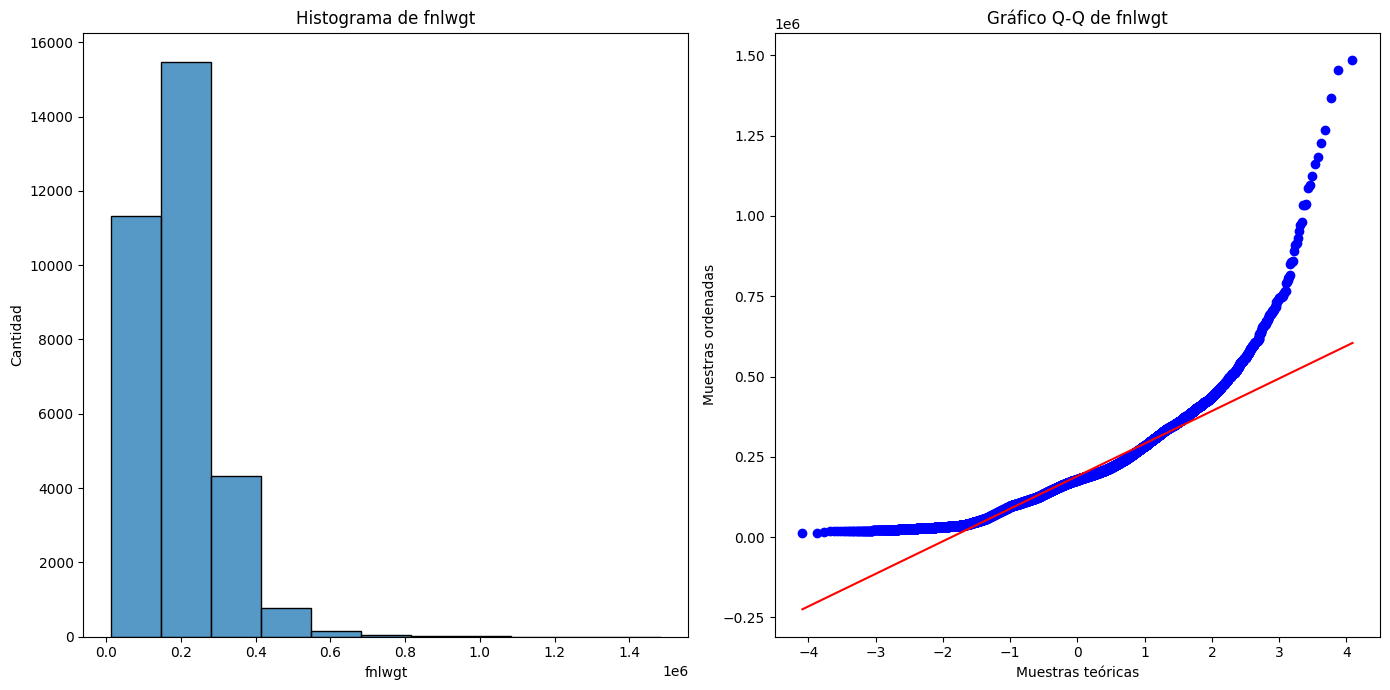

In [55]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
plt.subplots_adjust(hspace=0.3)  # Espacio entre graficos

#histograma
sns.histplot(ax=ax1, data=adultos, x='fnlwgt', bins=11)
ax1.set_title('Histograma de fnlwgt')
ax1.set_xlabel('fnlwgt')
ax1.set_ylabel('Cantidad')

# Crear gráfico Q-Q
stats.probplot(adultos['fnlwgt'], dist="norm", plot=ax2)
ax2.set_title('Gráfico Q-Q de fnlwgt')
ax2.set_xlabel('Muestras teóricas')
ax2.set_ylabel('Muestras ordenadas')
plt.tight_layout()  # Ajustar márgenes
plt.show()

En el histograma la mayoría de los datos se agrupan hacia la izquierda por lo que la distribución esta sesgada positivamente. En el grafico Q-Q vemos que los datos no se asemejan a una recta. En base a los 2 análisis podemos deducir que esta variable no sigue una distribución normal.

capital-ganancia: Para corroborar si la variable sigue una distribución normal, se mostrara su histograma y el grafico Q-Q.

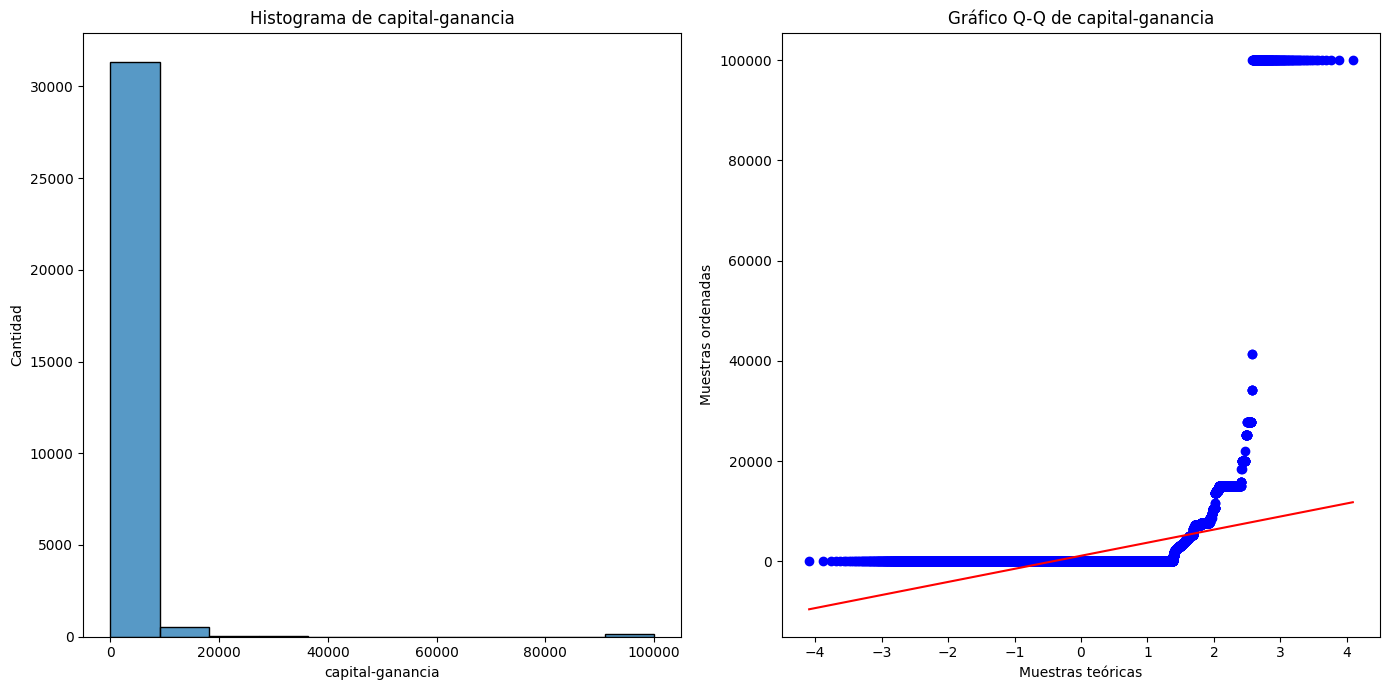

In [56]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
plt.subplots_adjust(hspace=0.3)  # Espacio entre graficos

#histograma
sns.histplot(ax=ax1, data=adultos, x='capital-ganancia', bins=11)
ax1.set_title('Histograma de capital-ganancia')
ax1.set_xlabel('capital-ganancia')
ax1.set_ylabel('Cantidad')

# Crear gráfico Q-Q
stats.probplot(adultos['capital-ganancia'], dist="norm", plot=ax2)
ax2.set_title('Gráfico Q-Q de capital-ganancia')
ax2.set_xlabel('Muestras teóricas')
ax2.set_ylabel('Muestras ordenadas')
plt.tight_layout()  # Ajustar márgenes
plt.show()

En el histograma la mayoría de los datos se agrupan hacia la izquierda por lo que la distribución esta sesgada positivamente. En el grafico Q-Q vemos que los datos no se asemejan a una recta. En base a los 2 análisis podemos deducir que esta variable no sigue una distribución normal.

capital-perdida: Para corroborar si la variable sigue una distribución normal, se mostrará su histograma y el grafico Q-Q.

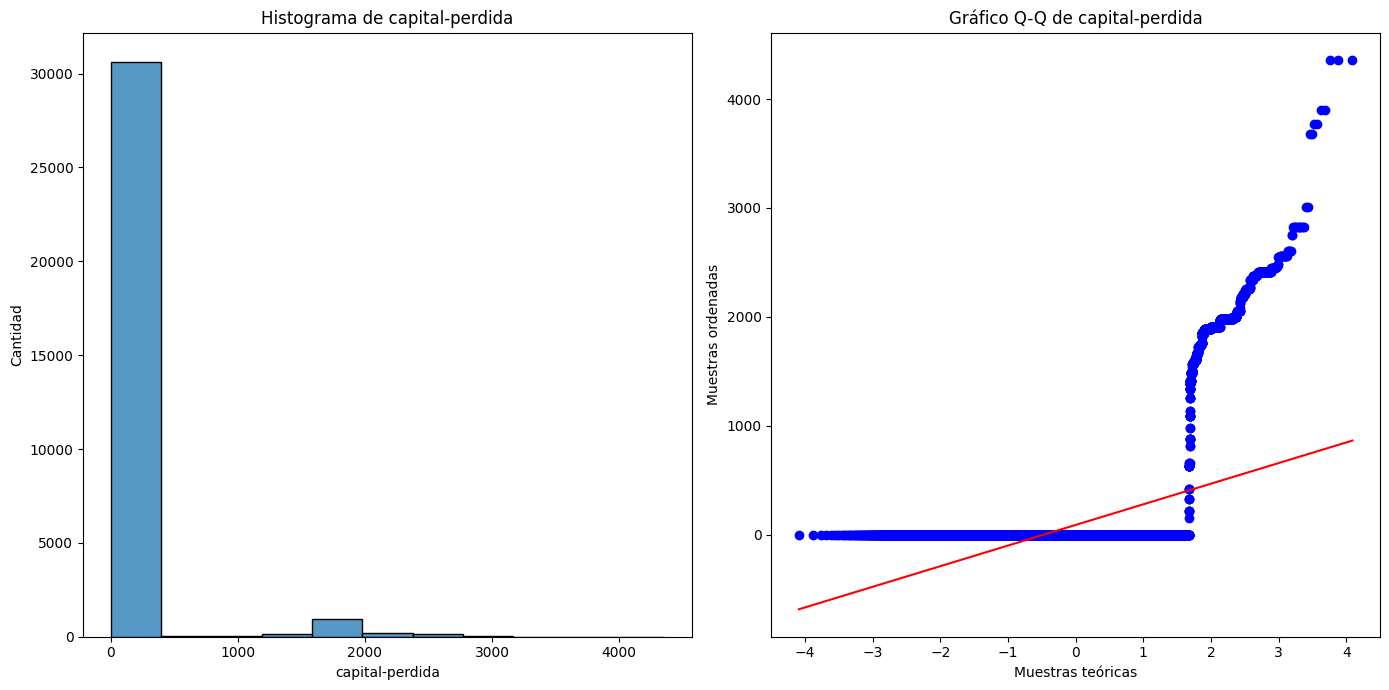

In [57]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
plt.subplots_adjust(hspace=0.3)  # Espacio entre graficos

#histograma
sns.histplot(ax=ax1, data=adultos, x='capital-perdida', bins=11)
ax1.set_title('Histograma de capital-perdida')
ax1.set_xlabel('capital-perdida')
ax1.set_ylabel('Cantidad')

# Crear gráfico Q-Q
stats.probplot(adultos['capital-perdida'], dist="norm", plot=ax2)
ax2.set_title('Gráfico Q-Q de capital-perdida')
ax2.set_xlabel('Muestras teóricas')
ax2.set_ylabel('Muestras ordenadas')
plt.tight_layout()  # Ajustar márgenes
plt.show()

En el histograma la mayoría de los datos se agrupan hacia la izquierda y algunos por ej centro por lo que la distribución esta sesgada positivamente. En el grafico Q-Q vemos que los datos no se asemejan a una recta. En base a los 2 análisis podemos deducir que esta variable no sigue una distribución normal.

Se procede a normalizar las variables.

In [58]:
#from sklearn.preprocessing import StandardScaler
columnasNormalizar = ['fnlwgt', 'capital-ganancia', 'capital-perdida']

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Normalizar las columnas seleccionadas
adultos[columnasNormalizar] = scaler.fit_transform(adultos[columnasNormalizar])

In [59]:
adultos.head()

,edad,clase-trabajo,clase-trabajo-num,fnlwgt,educacion,educacion-num,estado-civil,estado-civil-num,occupacion,occupacion-num,...,raza-num,sexo,sexo-num,capital-ganancia,capital-perdida,horas-por-semana,pais,pais-num,ingreso,ingreso-num
0,39,State-gov,7,-1.064087,Técnica,3,Never-married,0,Adm-clerical,0,...,1,Male,1,0.145851,-0.217369,40,United-States,38,<=50K,0
1,50,Self-emp-not-inc,2,-1.009184,Técnica,3,Married-civ-spouse,6,Exec-managerial,3,...,1,Male,1,-0.146752,-0.217369,13,United-States,38,<=50K,0
2,38,Private,4,0.244578,Secundaria,2,Divorced,2,Handlers-cleaners,5,...,1,Male,1,-0.146752,-0.217369,40,United-States,38,<=50K,0
3,53,Private,4,0.425297,Secundaria,2,Married-civ-spouse,6,Handlers-cleaners,5,...,2,Male,1,-0.146752,-0.217369,40,United-States,38,<=50K,0
4,28,Private,4,1.407653,Técnica,3,Married-civ-spouse,6,Prof-specialty,9,...,2,Female,0,-0.146752,-0.217369,40,Cuba,4,<=50K,0


### 4.4 Analizar la correlación entre variables


Nos quedamos con las variables determinantes para nuestro modelo

In [60]:
adultos = adultos[['edad', 'clase-trabajo-num', 'fnlwgt', 'educacion-num',
        'estado-civil-num','occupacion-num', 'relacion-num', 'raza-num',
       'sexo-num', 'capital-ganancia', 'capital-perdida','horas-por-semana',
       'pais-num', 'ingreso', 'ingreso-num']]

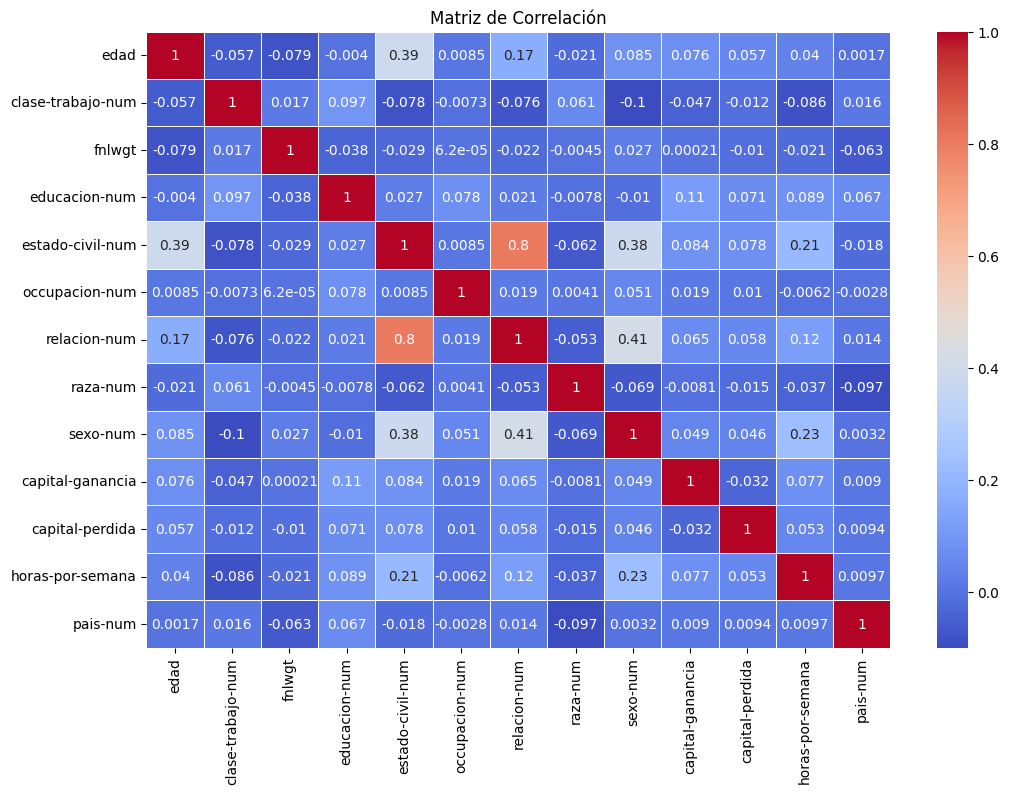

In [61]:
plt.figure(figsize=(12, 8))
#correlation_matrix = adultos.corr()
sns.heatmap(adultos.iloc[:,:13].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [62]:
adultos.head()

,edad,clase-trabajo-num,fnlwgt,educacion-num,estado-civil-num,occupacion-num,relacion-num,raza-num,sexo-num,capital-ganancia,capital-perdida,horas-por-semana,pais-num,ingreso,ingreso-num
0,39,7,-1.064087,3,0,0,0,1,1,0.145851,-0.217369,40,38,<=50K,0
1,50,2,-1.009184,3,6,3,5,1,1,-0.146752,-0.217369,13,38,<=50K,0
2,38,4,0.244578,2,2,5,0,1,1,-0.146752,-0.217369,40,38,<=50K,0
3,53,4,0.425297,2,6,5,5,2,1,-0.146752,-0.217369,40,38,<=50K,0
4,28,4,1.407653,3,6,9,4,2,0,-0.146752,-0.217369,40,4,<=50K,0


In [63]:
adultos.columns

Index(['edad', 'clase-trabajo-num', 'fnlwgt', 'educacion-num',
       'estado-civil-num', 'occupacion-num', 'relacion-num', 'raza-num',
       'sexo-num', 'capital-ganancia', 'capital-perdida', 'horas-por-semana',
       'pais-num', 'ingreso', 'ingreso-num'],
      dtype='object')

# 5. Minería de datos

### 5.1 Indicar claramente los algoritmos de Minería de Datos elegidos.


Uno de los algoritmos elegidos es el **Random Forest** ya que puede manejar datos categóricos como continuos y también es conocido por su capacidad para manejar grandes conjuntos de datos y su eficacia para prevenir el sobreajuste, estas características se adaptan a nuestro modelo ya que se tiene variables categóricas y numéricas y una cantidad considerable de registros.

Ventajas:

*   Maneja bien las variables categóricas y continuas.
*   Menos susceptible al sobreajuste en comparación con los árboles de decisión individuales.
*   Proporciona una estimación de la importancia de las variables.


Otra alternativa es el algoritmo **Gradient Boosting** Machines (GBM) el cual también funciona bien con conjuntos de datos grandes y variables mixtas. GBM construye el modelo en una etapa secuencial, donde cada nuevo árbol intenta corregir los errores cometidos por el modelo anterior.

Ventajas:

*   Alta precisión.
*   Maneja bien tanto datos categóricos como continuos.
*   Permite ajustar finamente los parámetros para mejorar el rendimiento.


Consideraciones:

*   GBM puede ser más lento en el entrenamiento comparado con Random Forest.
*   Puede requerir ajuste de hiperparámetros más cuidadoso para evitar el sobreajuste.

### 5.2  Describir las adaptaciones necesarias en los datos para construir el modelo.


El conjunto se dividirá en una sección de entrenamiento y en otra de test.

stratify=adultos['ingreso']: La estratificación garantiza que las proporciones de clases se mantengan consistentes entre los conjuntos de entrenamiento y prueba.

Sin esto, el conjunto de entrenamiento podría terminar con una distribución de clases diferente a la del conjunto de prueba real. Esto puede afectar negativamente el rendimiento del modelo, ya que este se entrena con una representación sesgada de las clases.

In [64]:
df_train, df_test = train_test_split(adultos, test_size=0.2, stratify=adultos['ingreso'])

Se reduce la dimensionalidad dejando en las variables X todas las columnas excepto las variables objetivos y en las variables Y estará la variable objetivo.

In [65]:
X_train = df_train.drop(['ingreso', 'ingreso-num'], axis=1)
X_test  = df_test.drop(['ingreso', 'ingreso-num'], axis=1)

y_train = df_train['ingreso-num']
y_test  = df_test['ingreso-num']

### 5.3 Detallar el algoritmo de Minería de Datos y el resultado esperado de manera superficial.


Random Forest

In [66]:
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest Testing Accuracy:', accuracy_score(y_test, y_pred_rf)*100,'%')

Random Forest Testing Accuracy: 85.73650645512522 %


Gradient Boosting

In [67]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)
print('Gradient Boosting Testing Accuracy:', accuracy_score(y_test, y_pred_gbm)*100,'%')

Gradient Boosting Testing Accuracy: 86.12536941981645 %


### 5.4 Explicar cómo se podrían utilizar esos patrones para tomar decisiones.

Basándonos en el Accuracy de ambos modelos el modelo de Gradient Boosting parece tener un mejor rendimiento que el modelo de Random Forest.
Si bien la precisión es una métrica común, es importante considerar otras métricas como recall, F1-score o AUC, entre otros; con el fin de determinar qué modelo es más optimo.


### 5.5 Proponer múltiples métodos de evaluación del desempeño del modelo

Se crea un método que nos ayudara a evaluar los modelos seleccionados.

In [68]:
#from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
#from sklearn.metrics import silhouette_score, classification_report, confusion_matrix , precision_score,  recall_score, auc,roc_curve,accuracy_score,f1_score

def Evaluate_Performance(Model, Xtrain, Xtest, Ytrain, Ytest) :
    Model.fit(Xtrain,Ytrain)
    overall_score = cross_val_score(Model, Xtrain,Ytrain, cv=10)
    model_score = np.average(overall_score)
    Ypredicted = Model.predict(Xtest)
    avg = 'weighted'
    print("\n • Training Accuracy Score : ", round(Model.score(Xtrain, Ytrain) * 100,2))
    print(f" • Cross Validation Score : {round(model_score * 100,2)}")
    print(f" • Testing Accuracy Score :{round(accuracy_score(Ytest, Ypredicted) * 100,2)}")
    print(f" • Precision Score is : {np.round(precision_score(Ytest, Ypredicted , average=avg) * 100,2)}")
    print(f" • Recall Score is : {np.round(recall_score(Ytest, Ypredicted , average=avg) * 100,2)}")
    print(f" • F1-Score Score is : {np.round(f1_score(Ytest, Ypredicted , average=avg) * 100,2)}")

In [69]:
print("Metricas del modelo Random Forest : ")
Evaluate_Performance(rf, X_train, X_test, y_train, y_test)

print('')
print('')

print("Metricas del modelo Gradient Boosting : ")
Evaluate_Performance(gbm, X_train, X_test, y_train, y_test)

Metricas del modelo Random Forest : 

 • Training Accuracy Score :  99.99
 • Cross Validation Score : 85.31
 • Testing Accuracy Score :85.74
 • Precision Score is : 85.21
 • Recall Score is : 85.74
 • F1-Score Score is : 85.32


Metricas del modelo Gradient Boosting : 

 • Training Accuracy Score :  86.67
 • Cross Validation Score : 86.25
 • Testing Accuracy Score :86.13
 • Precision Score is : 85.58
 • Recall Score is : 86.13
 • F1-Score Score is : 85.61


**Training Accuracy Score**:

*   Random Forest tiene un puntaje de 99.98, lo que sugiere que el modelo se ajusta extremadamente bien a los datos de entrenamiento. Aunque esto puede ser una señal de sobreajuste, donde el modelo no generaliza bien a nuevos datos.
*   Gradient Boosting tiene un puntaje de 86.63, lo cual a pesar de ser un valor menor es más razonable y sugiere que el modelo está menos sobre ajustado.

**Cross Validation Score**: Gradient Boosting tiene un porcentaje un poco mejor lo cual sugiere una mejor capacidad de generalización en diferentes subconjuntos del conjunto de datos.

**Testing Accuracy Score**: Gradient Boosting muestra un mejor performance en el conjunto de pruebas, lo cual es otro punto a su favor.

**Precision Score**: Gradient Boosting presenta una mejor precisión lo que lo menos propenso a dar falsos positivos.

**Recall Score**: Gradient Boosting es mejor en identificar verdaderos positivos.

**F1-Score**: Combinación de precisión y recall, y muestra que Gradient Boosting tiene un mejor equilibrio entre ambos.

**Conclusión**:
En base a las métricas proporcionadas, el modelo de Gradient Boosting parece ser la mejor opción. Este modelo Gradient Boosting parece aprender lo suficiente de los datos de entrenamiento para ser preciso, pero no tanto como para sobre ajustarse. Esto lo hace más confiable para predecir resultados en nuevos datos.

### 5.6 Proveer visualizaciones claras y significativas de los resultados del modelo.

**Curvas ROC y AUC**

La curva ROC (Receiver Operating Characteristic) es una gráfica que ilustra el rendimiento de un modelo de clasificación binaria a medida que varía el umbral de decisión.

El AUC (Área Bajo la Curva ROC) es una medida numérica que resume el rendimiento general del modelo en toda la gama de umbrales. Representa el área encerrada bajo la curva ROC.

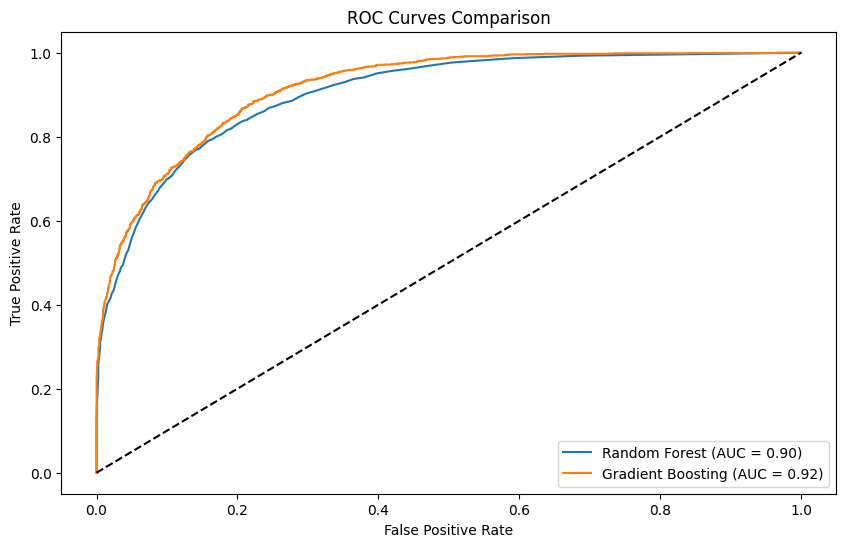

In [70]:
#from sklearn.metrics import roc_curve, roc_auc_score

# Predecir probabilidades
rf_probs = rf.predict_proba(X_test)[:, 1]
gbm_probs = gbm.predict_proba(X_test)[:, 1]

# Calcular curvas ROC
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
gbm_fpr, gbm_tpr, _ = roc_curve(y_test, gbm_probs)

# Calcular AUC
rf_auc = roc_auc_score(y_test, rf_probs)
gbm_auc = roc_auc_score(y_test, gbm_probs)

# Plotear las curvas ROC
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(gbm_fpr, gbm_tpr, label=f'Gradient Boosting (AUC = {gbm_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.show()

**Interpretación del AUC**: Cuanto más alto sea el AUC (cercano a 1), mejor será el rendimiento del modelo para discriminar entre las clases. En este caso se puede ver que el modelo Gradient Boosting tiene una ligera ventaja, lo cual va acorde a las conclusiones del item anterior.

**Interpretación de la curva ROC**: Una curva que se acerca más a la esquina superior izquierda indica un mejor rendimiento del modelo. La curva Gradient Boosting (color naranja) muestra un mejor rendimiento.

**Gráficos de Importancia de Características**

Los gráficos de importancia de características son herramientas visuales que ayudan a comprender la relevancia individual de cada característica en un modelo de aprendizaje automático

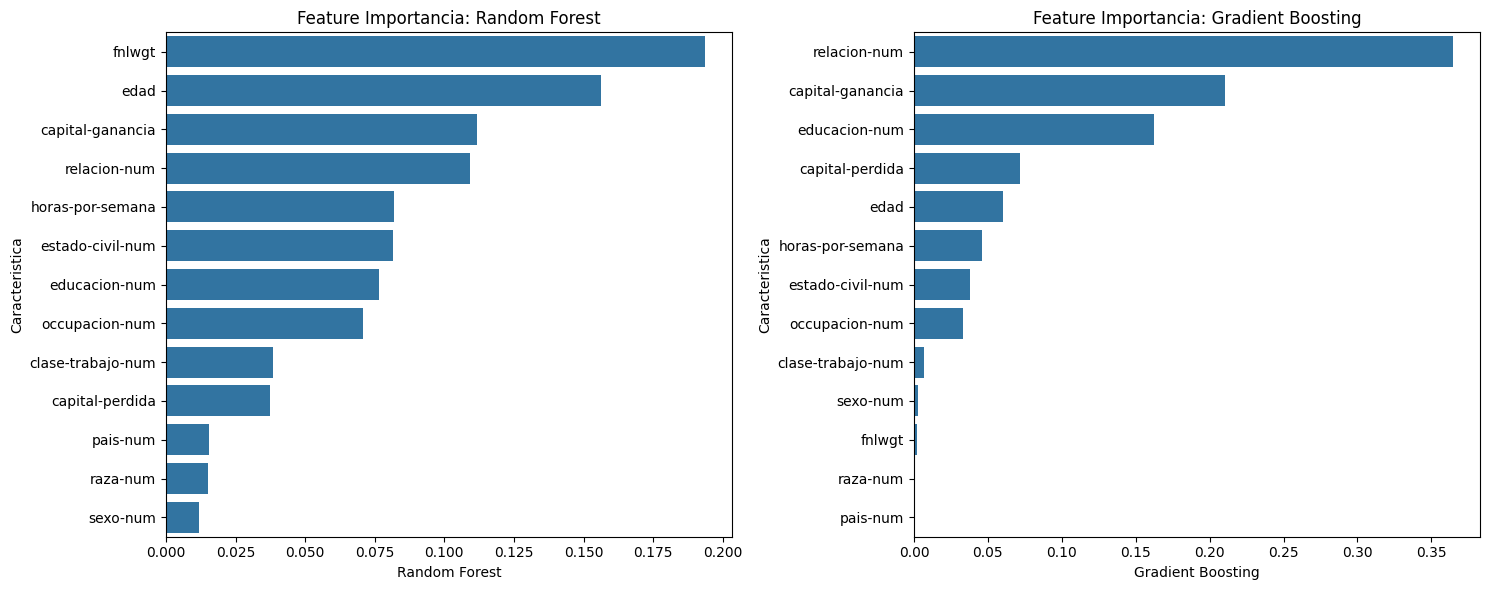

In [71]:
importances_rf = rf.feature_importances_
importances_gbm = gbm.feature_importances_

features = X_train.columns

# Crear un DataFrame para la relevancia
importance_df = pd.DataFrame({
    'Caracteristica': features,
    'Random Forest': importances_rf,
    'Gradient Boosting': importances_gbm
})

# Grafico de la relevancia de las variables
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(y='Caracteristica', x='Random Forest', data=importance_df.sort_values(by='Random Forest', ascending=False), ax=ax[0])
ax[0].set_title('Feature Importancia: Random Forest')

sns.barplot(y='Caracteristica', x='Gradient Boosting', data=importance_df.sort_values(by='Gradient Boosting', ascending=False), ax=ax[1])
ax[1].set_title('Feature Importancia: Gradient Boosting')

plt.tight_layout()
plt.show()


Para ambos modelos el país, la raza y el sexo son las características menos relevantes.
Para el modelo Random Forest las características más importantes son el fnlwgt, la edad y la ganancia de capital.
Y en cambio para el modelo Gradient Boosting las 3 características más importantes son la relación familiar, la ganancia del capital y el nivel de educación.


**Matriz de Confusión**: La matriz de confusión es una herramienta fundamental para evaluar el rendimiento de un modelo entrenado. Esta matriz tabular proporciona información detallada sobre cómo el modelo clasifica correcta o incorrectamente las instancias de las diferentes clases.

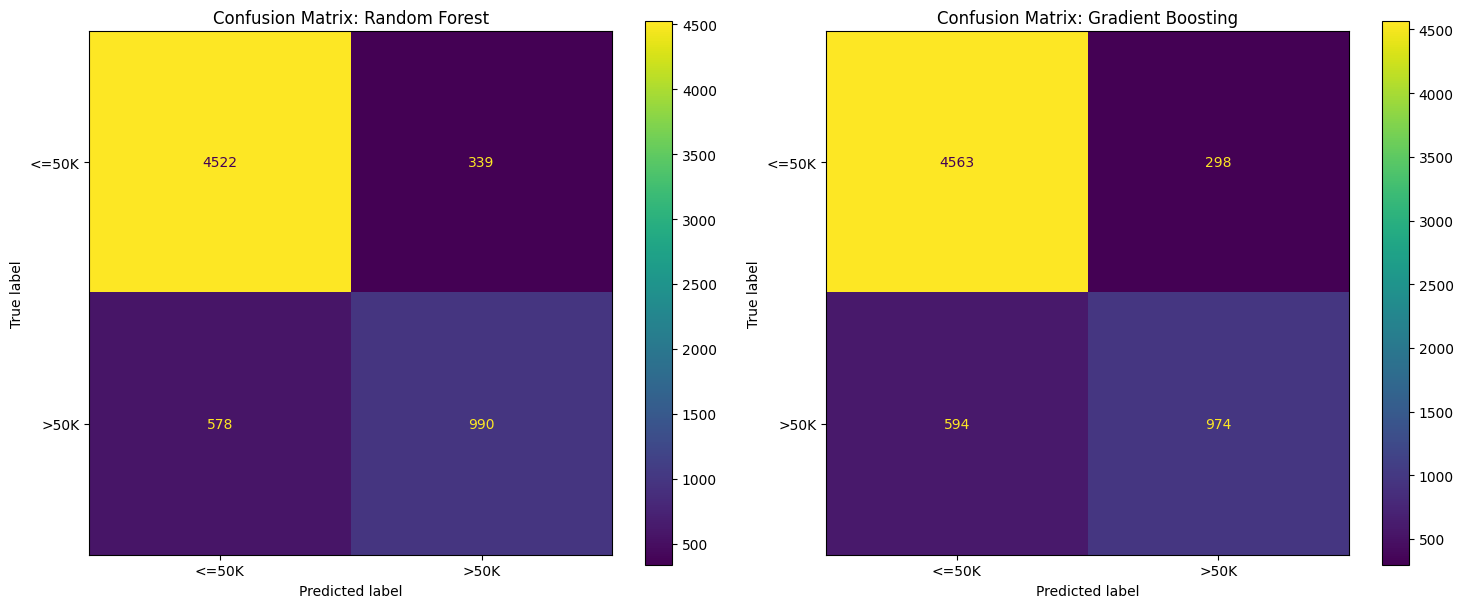

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predecir las etiquetas
rf_preds = rf.predict(X_test)
gbm_preds = gbm.predict(X_test)

# Crear las matrices de confusión
cm_rf = confusion_matrix(y_test, rf_preds)
cm_gbm = confusion_matrix(y_test, gbm_preds)

# Plotear las matrices de confusión
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ConfusionMatrixDisplay(cm_rf, display_labels=['<=50K', '>50K']).plot(ax=ax[0])
ax[0].set_title('Confusion Matrix: Random Forest')

ConfusionMatrixDisplay(cm_gbm, display_labels=['<=50K', '>50K']).plot(ax=ax[1])
ax[1].set_title('Confusion Matrix: Gradient Boosting')

plt.tight_layout()
plt.show()


**Matriz de Confusión del Modelo Random Forest**

*   Verdaderos Negativos (TN): 4519
*   Falsos Positivos (FP): 342
*   Falsos Negativos (FN): 615
*   Verdaderos Positivos (TP): 953

**Matriz de Confusión del Modelo Gradient Boosting**
*   Verdaderos Negativos (TN): 4595
*   Falsos Positivos (FP): 266
*   Falsos Negativos (FN): 603
*   Verdaderos Positivos (TP): 965


**Comparación**:

1.   **Verdaderos Negativos** (<=50K correctamente clasificados)
*   Random Forest: 4519
*   Gradient Boosting: 4595
*   Gradient Boosting clasifica correctamente a más personas con ingresos <=50K que Random Forest.



2.   **Falsos Positivos** (<=50K incorrectamente clasificados como >50K)

*   Random Forest: 342
*   Gradient Boosting: 266
*   Gradient Boosting tiene menos falsos positivos que Random Forest, lo que significa que es menos probable que clasifique incorrectamente a personas con ingresos <=50K como si tuvieran ingresos >50K.


3.  **Falsos Negativos** (>50K incorrectamente clasificados como <=50K)

*   Random Forest: 615
*   Gradient Boosting: 603
*   Gradient Boosting tiene menos falsos negativos que  Random Forest, lo que significa que es menos probable que clasifique incorrectamente a personas con ingresos >50K como si tuvieran ingresos <=50K.


4.   **Verdaderos Positivos** (>50K correctamente clasificados)

*   Random Forest: 953
*   Gradient Boosting: 965
*   Gradient Boosting clasifica correctamente a más personas con ingresos >50K que Random Forest.

 Gradient Boosting parece tener un mejor rendimiento en comparación con el modelo Random Forest según la matriz de confusión.

### Conclusión

Para este DataSet el modelo Gradien Boosting tiene mejores características comparado con el Random Forest, especialmente en el punto de que no está sobre ajustado y se adaptaría mejor a datos nuevos.